In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset\Spam SMS Collection', sep='\t', names=['label', 'message'])

# **Exploratory Data Analysis (EDA) / Keşifsel Veri Analizi (EDA)**
* Exploring NaN values in dataset / Veri kümesindeki NaN değerlerini keşfetme
* Plotting countplots for Spam vs. Ham / Veri kümesindeki NaN değerlerini keşfetme



In [3]:
df.shape

(5572, 2)

In [4]:
df.columns

Index(['label', 'message'], dtype='object')

In [5]:
df.dtypes

label      object
message    object
dtype: object

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


_**Note: No NaN values** in the dataset._ / _**Not: Veri kümesinde NaN değeri yok**._

In [10]:
# Mapping values for label
# Etiket için eşleme değerleri
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [11]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

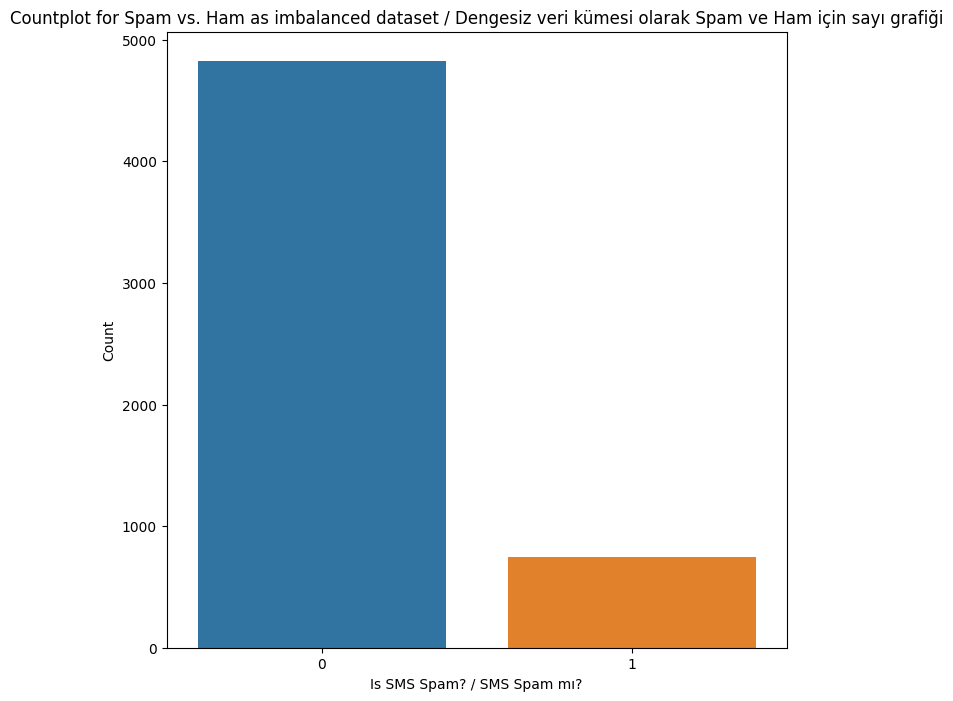

In [14]:
# Countplot for Spam vs. Ham as imbalanced dataset
# Spam ve Ham için dengesiz veri kümesi olarak sayı grafiği
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset / Dengesiz veri kümesi olarak Spam ve Ham için sayı grafiği')
p = plt.xlabel('Is SMS Spam? / SMS Spam mı?')
p = plt.ylabel('Count')

_**Insight:** From the above countplot, it is evident that the **dataset is imbalanced**._

_**İçgörü:** Yukarıdaki sayı grafiğinden, **veri kümesinin dengesiz olduğu** açıktır.

# **Feature Engineering** / **Özellik Mühendisliği**
*    Handling imbalanced dataset using Oversampling 
*    Aşırı Örnekleme kullanarak dengesiz veri kümesini işleme
##### --------------------------------------------------------------
*    Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.
*    Yeni özellikler oluşturma, örn. kelime_sayısı, içerir_para birimi_sembol, içerir_sayılar, vb.


In [15]:
# Handling imbalanced dataset using Oversampling
# Aşırı Örnekleme kullanarak dengesiz veri kümesini işleme
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [16]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape

(9307, 2)

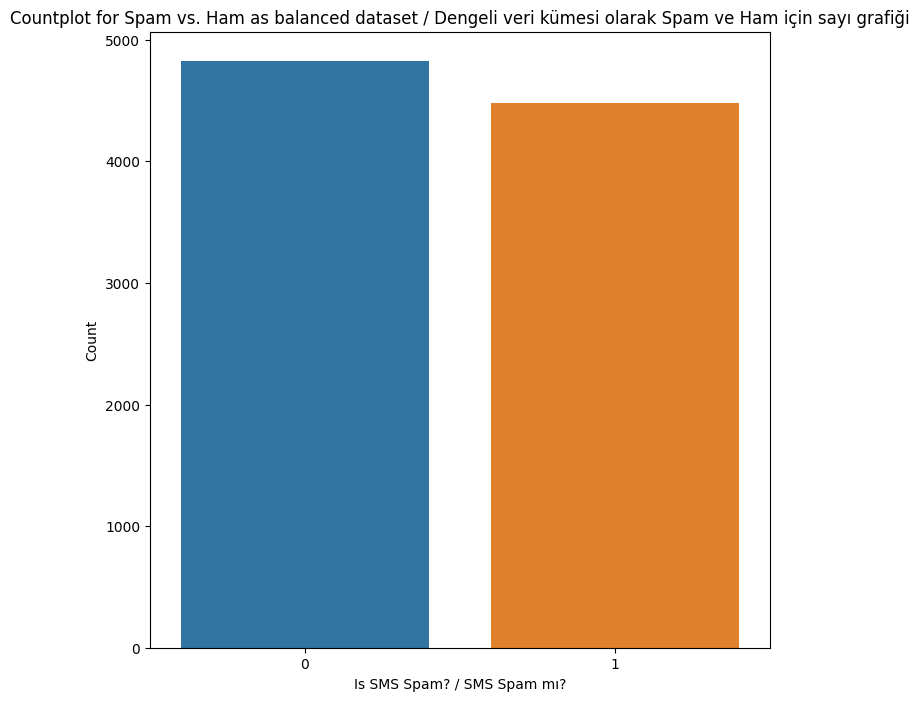

In [17]:
# Countplot for Spam vs. Ham as balanced dataset
# Dengeli veri kümesi olarak Spam ve Ham için sayı grafiği
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset / Dengeli veri kümesi olarak Spam ve Ham için sayı grafiği')
p = plt.xlabel('Is SMS Spam? / SMS Spam mı?')
p = plt.ylabel('Count')

In [18]:
# Creating new feature word_count
# Yeni özellik word_count oluşturuluyor
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [19]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_15356\4208000607.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==0].word_count)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_15356\4208000607.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label

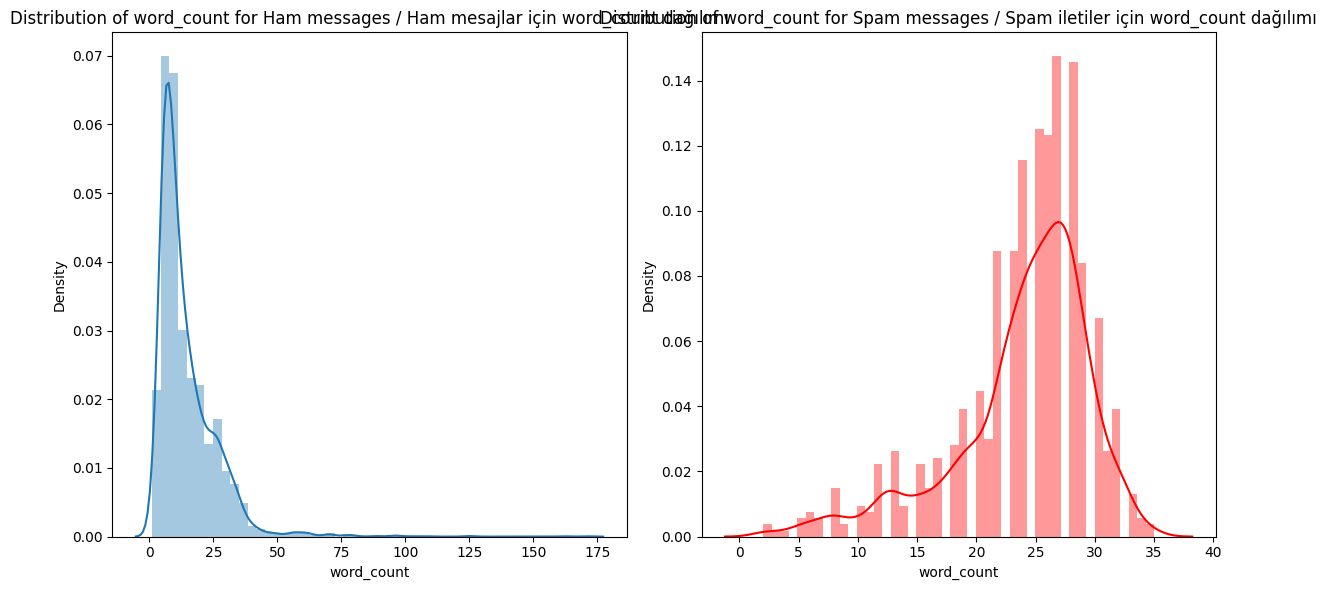

In [20]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
# 1 satır, 2 sütun, ilk alt plana git
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages / Ham mesajlar için word_count dağılımı')

# 1-row, 2-column, go to the second subplot
# 1 satır, 2 sütun, ikinci alt çizime git
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages / Spam iletiler için word_count dağılımı')

plt.tight_layout()
plt.show()

_**Insight:** **Spam messages** word_count fall in the range of **15-30 words**, whereas majority of the **Ham messages** fall in the range of **below 25 words**._

_**İçgörü:** **Spam mesajları** word_count **15-30 kelime** aralığında yer alırken, **Ham mesajları** çoğunluğu **25 kelimeden az** aralığındadır ._

In [21]:
# Creating feature contains_currency_symbol
# Özellik oluşturma contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [22]:
df.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


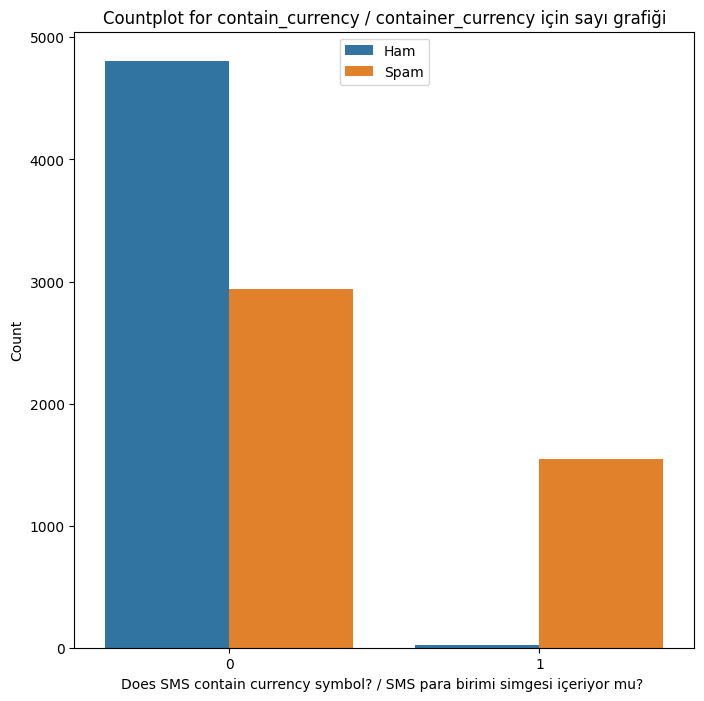

In [23]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency / container_currency için sayı grafiği')
p = plt.xlabel('Does SMS contain currency symbol? / SMS para birimi simgesi içeriyor mu? ')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight: Almost 1/3 of Spam messages contain currency symbols**, and currency symbols are **rarely used in Ham messages.**_

_**Bilgi: Spam mesajlarının neredeyse 1/3'ü para birimi simgeleri içerir** ve para birimi simgeleri **Ham mesajlarında nadiren kullanılır**_

In [24]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['message'].apply(numbers)

In [25]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


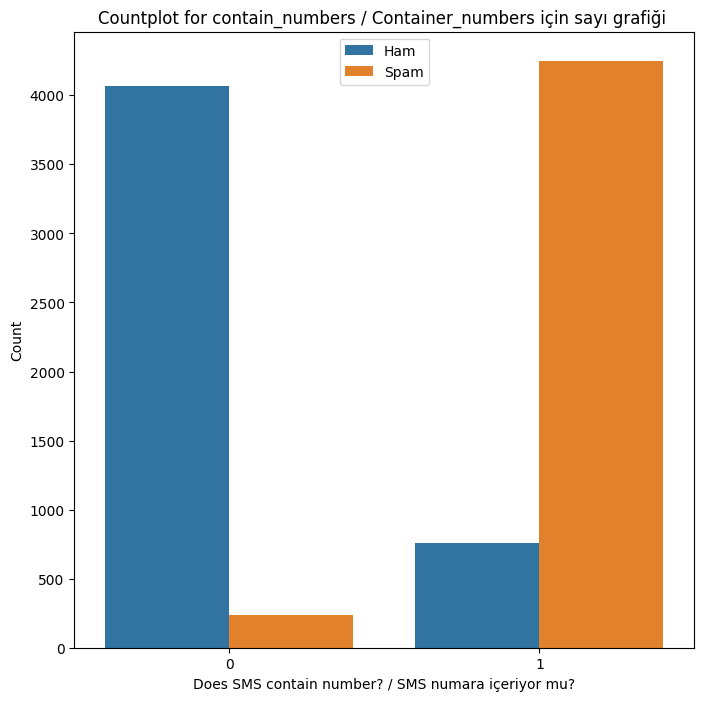

In [26]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers / Container_numbers için sayı grafiği ')
p = plt.xlabel('Does SMS contain number? / SMS numara içeriyor mu?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight:** It is evident that **most of the Spam messages contain numbers,** and **majority of the Ham messages donot contain numbers.**_

_**İçgörü:** **Spam iletilerinin çoğunun sayı içerdiği** ve **Ham iletilerinin çoğunun sayı içermediği** açıktır.

# **Data Cleaning**
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages
#### -------------------------------------------------------
# **Veri temizleme**
* Düzenli ifade kullanarak özel karakter ve sayıların kaldırılması
* Tüm sms'i küçük harfe dönüştürme
* Sms'yi kelimelerle belirtme
* Durdurma sözcüklerini kaldırma
* Kelimeleri lemmatize etmek
* Lemmatize kelimelerin birleştirilmesi
* Bir mesaj topluluğu oluşturma

In [27]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\Serkan
[nltk_data]     POLAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Serkan
[nltk_data]     POLAT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# Cleaning the messages
# Mesajları temizleme
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  # Sms'den özel karakter temizleme
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  # Tüm sms'i küçük harfe dönüştürme
  message = message.lower()

  # Tokenizing the sms by words
  # Sms'i kelimelere göre belirleme
  words = message.split()

  # Removing the stop words
  # Durdurma sözcüklerini kaldırma
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  # Kelimeleri Lemmatize etmek
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  # Lemmatize kelimelerin birleştirilmesi
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  # Bir mesaj topluluğu oluşturma
  corpus.append(message)

In [29]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [30]:
# Creating the Bag of Words model
# Bag of Word modelinin oluşturulması
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out() 

In [31]:
# Extracting independent and dependent variables from the dataset
# Veri kümesinden bağımsız ve bağımlı değişkenleri çıkarma
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

# **Model Building & Evaluation**
_**Metric: F1-Score**_

* Multiomail Naive Bayes: 0.943
* Decision Tree: 0.98
* **Random Forest (Ensemble): 0.994**
* Voting (Multinomial Naive Bayes + Decision Tree): 0.98

#### ---------------------------------------------

# **Model Oluşturma ve Değerlendirme**
_**Metrik: F1 Puanı**_

* Çoklu Posta Naive Bayes: 0.943
* Karar Ağacı: 0.98
* **Rastgele Orman (Topluluk): 0,994**
* Oylama (Çok terimli Naive Bayes + Karar Ağacı): 0,98

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Fitting Naive Bayes to the Training set
# Naive Bayes'i Eğitim setine uydurma
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model / MNB modeli için ortalama F1 Puanı: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation / Standart sapma: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model / MNB modeli için ortalama F1 Puanı: 0.943 ---
Standard Deviation / Standart sapma: 0.004


In [35]:
# Classification report for MNB model
# MNB modeli için sınıflandırma raporu
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model / MNB modeli için sınıflandırma raporu ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model / MNB modeli için sınıflandırma raporu ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



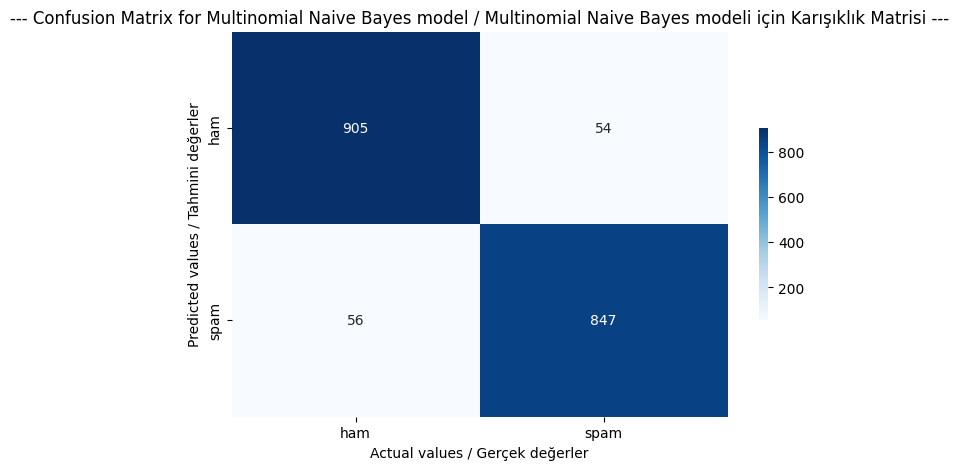

In [36]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values / Gerçek değerler')
p = plt.ylabel('Predicted values / Tahmini değerler')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model / Multinomial Naive Bayes modeli için Karışıklık Matrisi ---')

In [37]:
# Fitting Random Forest to the Training set
# Rastgele Ormanı Eğitim setine sığdırmak
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model / Karar Ağacı modeli için Ortalama F1 Puanı: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation / Standart sapma: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model / Karar Ağacı modeli için Ortalama F1 Puanı: 0.98 ---
Standard Deviation / Standart sapma: 0.003


In [38]:
# Classification report for Decision Tree model
# Karar Ağacı modeli için sınıflandırma raporu
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model / Karar Ağacı modeli için sınıflandırma raporu ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model / Karar Ağacı modeli için sınıflandırma raporu ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



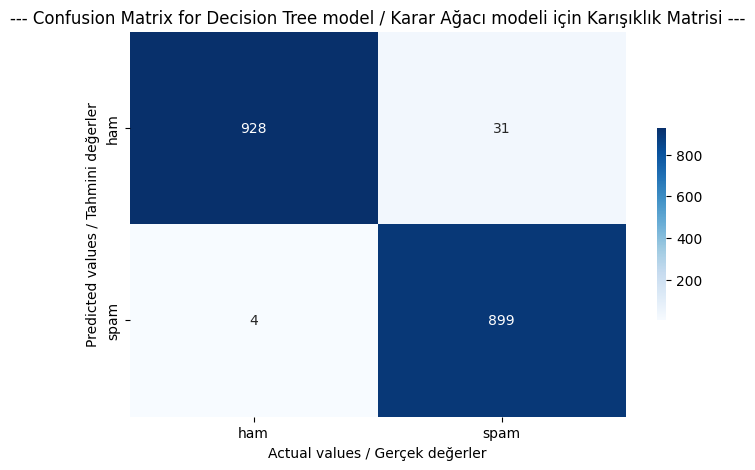

In [39]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values / Gerçek değerler')
p = plt.ylabel('Predicted values / Tahmini değerler')
p = plt.title('--- Confusion Matrix for Decision Tree model / Karar Ağacı modeli için Karışıklık Matrisi ---')

In [40]:
# Fitting Random Forest to the Training set
# Rastgele Ormanı Eğitim setine sığdırmak
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model / Rastgele Orman modeli için ortalama F1 Puanı: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation / Standart Sapma: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model / Rastgele Orman modeli için ortalama F1 Puanı: 0.995 ---
Standard Deviation / Standart Sapma: 0.003


In [41]:
# Classification report for Random Forest model
# Rastgele Orman modeli için sınıflandırma raporu
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model / Rastgele Orman modeli için sınıflandırma raporu ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model / Rastgele Orman modeli için sınıflandırma raporu ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



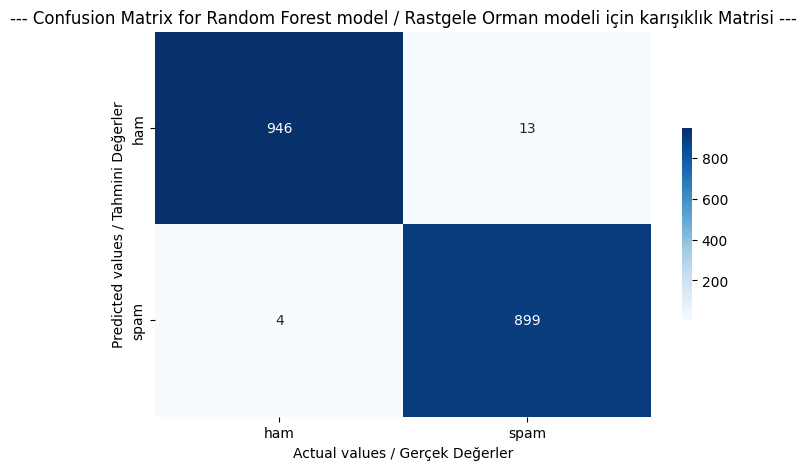

In [42]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values / Gerçek Değerler')
p = plt.ylabel('Predicted values / Tahmini Değerler')
p = plt.title('--- Confusion Matrix for Random Forest model / Rastgele Orman modeli için karışıklık Matrisi ---')

_**Note:** Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!_

_**Not:** Karar Ağacı ve MNB algoritmaları seçilir ve F1 Puanını artırmak için Oylama algoritmasına beslenir!_

In [43]:
# Fitting Decision Tree and MNB to VotingClassifier
# Karar Ağacı ve MNB'yi VotingClassifier'a sığdırma
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model / Oylama Sınıflandırıcı modeli için ortalama F1 Puanı: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation/ Standart Sapma: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model / Oylama Sınıflandırıcı modeli için ortalama F1 Puanı: 0.98 ---
Standard Deviation/ Standart Sapma: 0.004


_**Note:** Voting algorithm did not out-perform Random Forest algorithm, hence **Random Forest algorithm is selected for predicting the results of this problem statement.**_


_**Not:** Oylama algoritması, Rastgele Orman algoritmasından daha iyi performans göstermedi, bu nedenle **Bu sorun bildiriminin sonuçlarını tahmin etmek için Rastgele Orman algoritması seçildi.**_

# **Making Predictions** / **Tahmin Yapma**

In [44]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [45]:
# Prediction 1 - Lottery text message
# Tahmin 1 - Piyango metin mesajı
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message. / Anladım! Bu bir SPAM mesajıdır.')
else:
  print('This is a HAM (normal) message. / Bu bir HAM (normal) mesajıdır.')

Gotcha! This is a SPAM message. / Anladım! Bu bir SPAM mesajıdır.


c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
# Prediction 2 - Casual text chat
# Tahmin 2 - Günlük metin sohbeti
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message. / Anladım! Bu bir SPAM mesajıdır.')
else:
  print('This is a HAM (normal) message. / Bu bir HAM (normal) mesajıdır.')

This is a HAM (normal) message. / Bu bir HAM (normal) mesajıdır.


c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [47]:
# Prediction 3 - Transaction confirmation text message
# Tahmin 3 - İşlem onayı metin mesajı
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message. / Anladım! Bu bir SPAM mesajıdır.')
else:
  print('This is a HAM (normal) message. / Bu bir HAM (normal) mesajıdır.')

This is a HAM (normal) message. / Bu bir HAM (normal) mesajıdır.


c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
# Predicting values 4 - Feedback message
# Tahmin değerleri 4 - Geri bildirim mesajı
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message. / Anladım! Bu bir SPAM mesajıdır.')
else:
  print('This is a HAM (normal) message. / Bu bir HAM (normal) mesajıdır.')

Gotcha! This is a SPAM message. / Anladım! Bu bir SPAM mesajıdır.


c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
